# Code to estimate floating point operations for a function
- Using example from http://www.bnikolic.co.uk/blog/python/flops/2019/09/27/python-counting-events.html
- Default "PAPI_FP_OPS" event doesn't exist for some CPUs

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pypapi import events, papi_high as high


In [8]:
count_expected = []
count_SP = []
count_DP = []

n_list = [10, 100, 200, 500, 1000, 2000]
for n in n_list:
    c = 4*np.log(n**2)*n**2-6*n**2 + 8
    count_expected.append(c)

    aa = np.mgrid[0:n:1,0:n:1][0]
    
    high.start_counters([events.PAPI_SP_OPS,]) #default: PAPI_FP_OPS
    a = np.fft.fft(aa)
    SP = high.stop_counters() 
    count_SP += SP

    high.start_counters([events.PAPI_DP_OPS,]) #default: PAPI_FP_OPS
    a = np.fft.fft(aa)
    DP = high.stop_counters()
    count_DP += DP
    # print("n: {}, exp: {}, SP: {}, DP: {}".format(n, c, SP, DP)) # Or record results in another way

count_df = pd.DataFrame()
count_df['n'] = n_list
count_df['expected'] = count_expected
count_df['SP'] = count_SP
count_df['DP'] = count_DP
count_df.head()


PapiInvalidValueError: Invalid Argument. (PAPI_EINVAL)

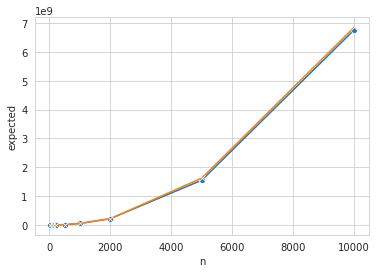

In [28]:
with sns.axes_style("whitegrid"):
    g = sns.lineplot(x='n',y='expected',data=count_df, marker='o')    
    g = sns.lineplot(x='n',y='DP',data=count_df, marker='x')    


In [12]:
count_df = pd.DataFrame(columns=['task','count'])
count_df.loc[0] = ['a',10]
count_df.loc[1] = ['b',20]

count_df

,task,count
0,a,10
1,b,20


In [ ]:
### Recon-all: autorecon1 (stages:1-5)
n_flops: 110781
### Recon-all: autorecon2 (stages: 6:23) 
n_flops: 1372448
